## Ejercicio 1.6

En la base estudio.xlsx se encuentran registradas las horas de estudios referidas por un conjunto de estudiantes y su calificación en la evaluación final.

In [1]:
library(readxl)
library(ggplot2)
library(dplyr)
library(MVN)
library(corrplot)
library(aod)
library(lmtest)
library(car)
library(MASS)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




In [2]:
PARAM <- list()
PARAM$HOME <- "C://Austral/mcd-reg-adv/datasets/"
PARAM$FILE <- "estudio.csv"
file_name <- paste0(PARAM$HOME,PARAM$FILE)

In [3]:
estudio <- read.csv(file_name, sep = ";")
head(estudio)

,horas_estudio,puntaje
,<dbl>,<int>
1,1.0,28
2,1.0,38
3,1.5,45
4,1.5,44
5,2.0,52
6,2.0,50


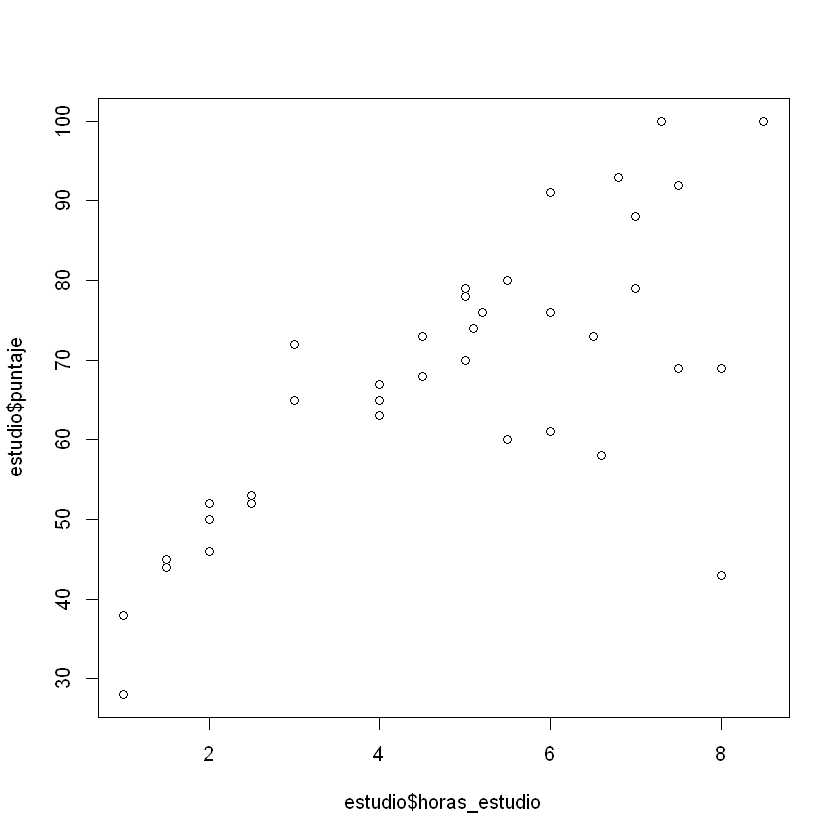

In [5]:
plot( estudio$horas_estudio, estudio$puntaje )

### a) Ajuste un modelo de regresión simple para estimar la nota final en función de las horas dedicadas al estudio.

In [6]:
mod_hs_est <- lm ( puntaje ~ horas_estudio, data = estudio )
summary( mod_hs_est )


Call:
lm(formula = puntaje ~ horas_estudio, data = estudio)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.506  -4.395   1.623   8.204  18.491 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    39.8305     4.9007   8.127 1.43e-09 ***
horas_estudio   5.7094     0.9288   6.147 4.94e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.24 on 35 degrees of freedom
Multiple R-squared:  0.5192,	Adjusted R-squared:  0.5054 
F-statistic: 37.79 on 1 and 35 DF,  p-value: 4.943e-07


### b) Estudie el cumplimiento de los supuestos del modelo, gráfica y analíticamente

In [14]:
IC_mod_hs_est <- predict( mod_hs_est, 
    interval = "confidence", 
    level = 0.95 )

IP_mod_hs_est <- predict( mod_hs_est, 
    newdata = estudio$horas_estudio, 
    interval = "prediction", 
    level = 0.95 )

datos <- data.frame ( estudio$horas_estudio, puntaje, IP_mod_hs_est )

ERROR: Error in eval(predvars, data, env): objeto 'horas_estudio' no encontrado


In [9]:
ggplot(data = datos, mapping = aes (x = horas_estudio, y = puntaje)) +
  geom_point(color = "darkorange", size = 2) +
  labs(title = "Diagrama de dispersión con bandas de confianza y predicción - Modelo 1 (OLS Simple)", x = "horas_estudio") + 
  geom_line(aes(y=lwr), color = "red", linetype = "dashed") +
  geom_line(aes(y=upr), color = "red", linetype = "dashed") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

ERROR: Error in ggplot(data = datos, mapping = aes(x = horas_estudio, y = puntaje)): objeto 'datos' no encontrado


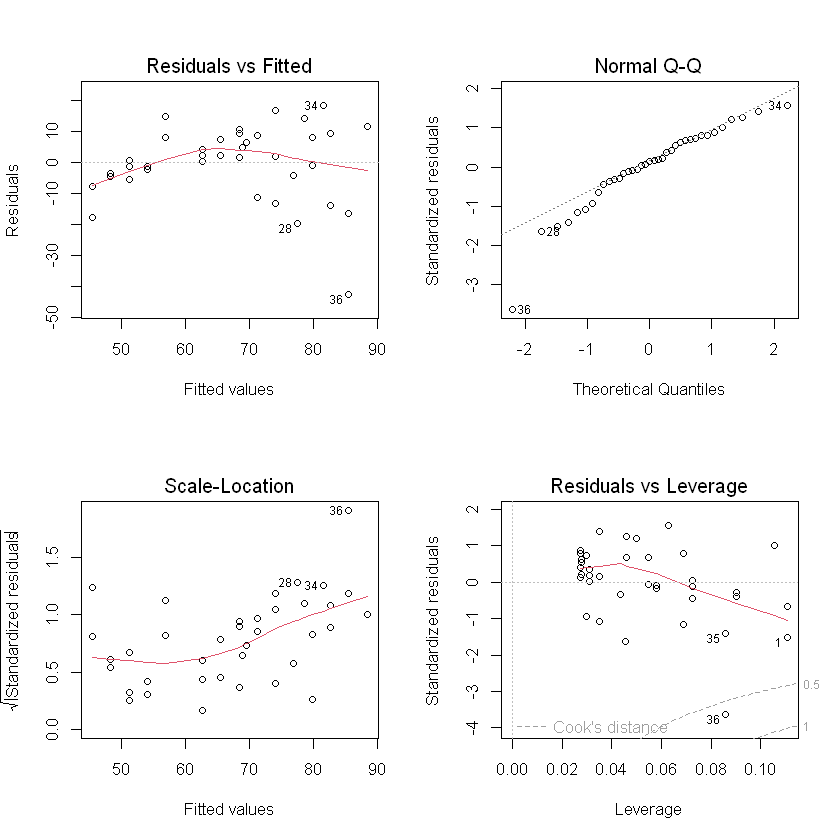

In [18]:
par( mfrow = c(2,2) )
plot( mod_hs_est )

In [19]:
shapiro.test( mod_hs_est$residuals )


	Shapiro-Wilk normality test

data:  mod_hs_est$residuals
W = 0.92105, p-value = 0.01196


Podríamos no rechazar normalidad.

In [20]:
bptest( mod_hs_est )


	studentized Breusch-Pagan test

data:  mod_hs_est
BP = 4.781, df = 1, p-value = 0.02877


Rechazamos H0 de homocedasticidad

In [21]:
dwt( mod_hs_est )

 lag Autocorrelation D-W Statistic p-value
   1       0.0446036      1.826352   0.474
 Alternative hypothesis: rho != 0

No rechazamos H0 de no autocorrelación

### c) Ajuste un modelo de mínimos cuadrados ponderados definiendo los pesos de tal manera que las observaciones con menor varianza tengan mas peso.

In [22]:
# Coincidiendo con Chat GPT, si lo hago por "fitted.values", R^2 cae a 0.6455

W <- 1 / ( (mod_hs_est$residuals)^2 )  
mod_hs_est_wls <- lm ( puntaje ~ horas_estudio, data = estudio, weights = W )
summary( mod_hs_est_wls )


Call:
lm(formula = puntaje ~ horas_estudio, data = estudio, weights = W)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.5138 -1.0195  0.8341  0.9563  0.9914 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    39.7497     0.7773   51.14   <2e-16 ***
horas_estudio   5.7794     0.1853   31.18   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.018 on 35 degrees of freedom
Multiple R-squared:  0.9653,	Adjusted R-squared:  0.9643 
F-statistic: 972.3 on 1 and 35 DF,  p-value: < 2.2e-16


### d) Realice el análisis de diagnóstico del segundo modelo ajustado

In [23]:
shapiro.test( mod_hs_est_wls$residuals )


	Shapiro-Wilk normality test

data:  mod_hs_est_wls$residuals
W = 0.91736, p-value = 0.009279


Rechazamos H0 de normalidad (justito)

In [24]:
bptest( mod_hs_est_wls )


	studentized Breusch-Pagan test

data:  mod_hs_est_wls
BP = 0.00058108, df = 1, p-value = 0.9808


No rechazamos H0 de homocedasticidad

In [25]:
dwt( mod_hs_est_wls )

 lag Autocorrelation D-W Statistic p-value
   1      0.04612406      1.825665   0.466
 Alternative hypothesis: rho != 0

No rechazamos H0 de no autocorrelación

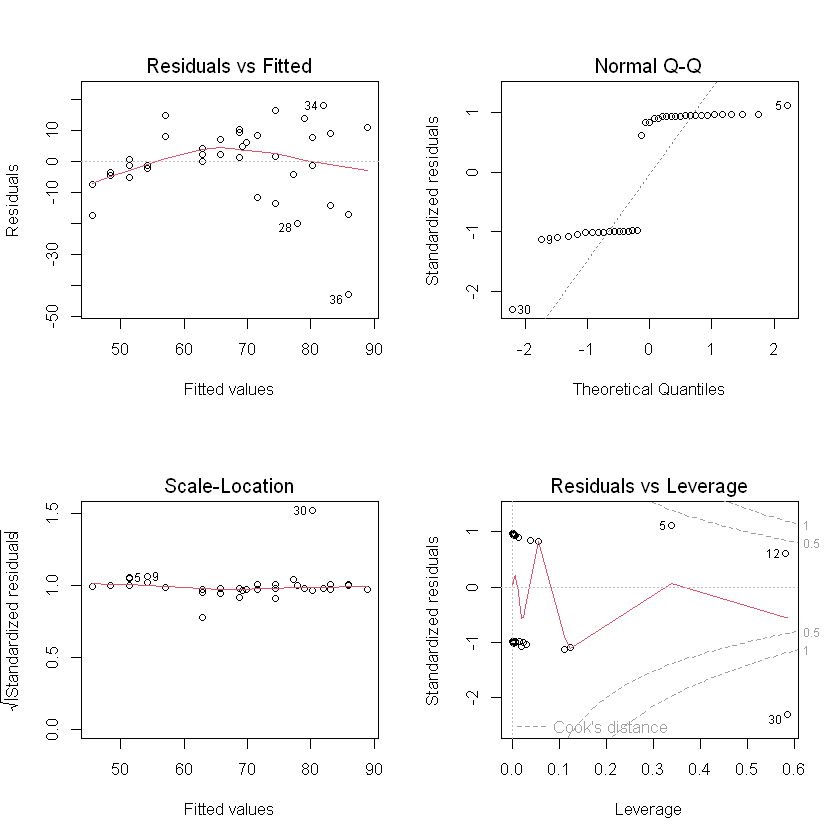

In [26]:
par( mfrow = c(2,2) )
plot( mod_hs_est_wls )

In [27]:
IC_mod_hs_est_wls <- predict( mod_hs_est_wls, 
    interval = "confidence", 
    level = 0.95 )

IP_mod_hs_est_wls <- predict( mod_hs_est_wls, 
    newdata = data.frame( horas_estudio=horas_estudio ), 
    interval = "prediction", level = 0.95 )

ERROR: Error in data.frame(horas_estudio = horas_estudio): objeto 'horas_estudio' no encontrado


In [28]:
datos <- data.frame ( horas_estudio, puntaje, IP_mod_hs_est_wls )

ggplot( data = datos, mapping = aes (x = horas_estudio, y = puntaje) ) +
    geom_point( color = "blue", size = 2 ) +
    labs( title = "Diagrama de dispersión con bandas de confianza y predicción - Modelo 2 (WLS)", x = "horas_estudio" ) + 
    geom_line( aes(y=lwr), color = "black", linetype = "dashed" ) +
    geom_line( aes(y=upr), color = "black", linetype = "dashed" ) +
    geom_smooth( method = "lm", se = TRUE, color = "darkblue" ) +
    theme_bw() +
    theme( plot.title = element_text(hjust = 0.5) )

ERROR: Error in data.frame(horas_estudio, puntaje, IP_mod_hs_est_wls): objeto 'horas_estudio' no encontrado


In [ ]:
plot(horas_estudio, puntaje, xlab = "Horas Estudio", ylab = "Puntaje", main = "Horas de estudio vs puntaje - models fitt", pch = 16)
abline(mod_hs_est, col = "darkorange", lwd = 2)
abline(mod_hs_est_wls, col = "blue", lwd = 2)